In [1]:
# %matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
t = 175
filename='A304_MR_Data\\A304_175K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7']) 

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [4]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df['B'] = df['B_int']
df = df[["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000,175.013145,6978.991405,-6979.284689,6180.327759,-6180.357369,6979.938442,-6979.934969,6180.002625,-6179.982830,-0.000002,1000000
1,0.001,9000,175.003528,6980.237772,-6980.074252,6180.942660,-6180.868031,6980.430509,-6980.507452,6180.657376,-6180.480832,-0.000002,1000000
2,0.001,8000,175.000055,6980.742616,-6980.708475,6181.488609,-6181.446181,6981.059930,-6981.063103,6181.337505,-6181.129309,-0.000002,1000000
3,0.001,7000,174.999690,6981.266103,-6981.225171,6182.015571,-6181.923760,6981.579399,-6981.576618,6181.810270,-6181.591545,-0.000002,1000000
4,0.001,6000,175.000277,6981.767588,-6981.721786,6182.452944,-6182.459304,6982.039764,-6982.031500,6182.347100,-6182.130096,-0.000002,1000000


In [5]:
df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

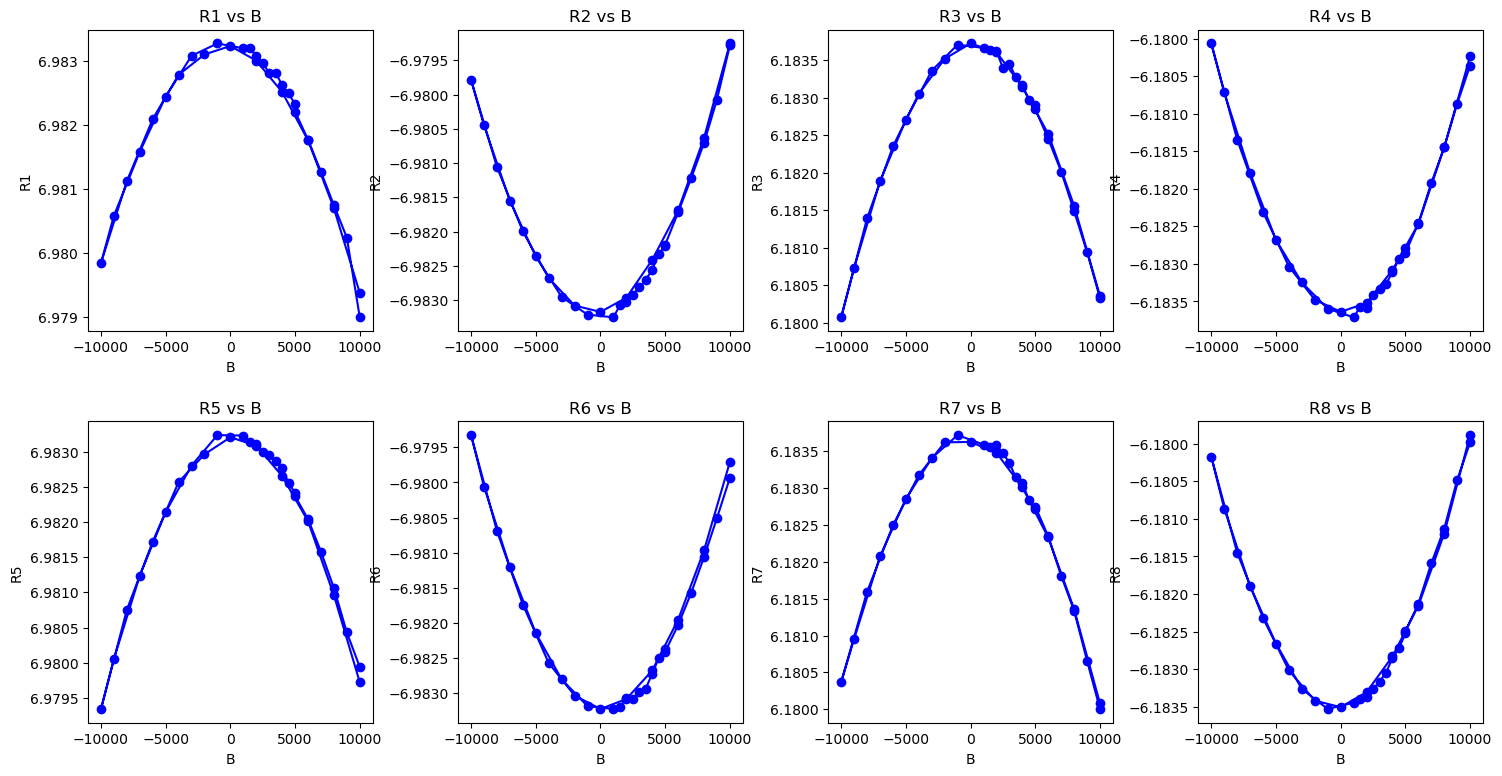

In [6]:
plt.figure(figsize=(18,9))
plt.subplot(2,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(2,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(2,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(2,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(2,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(2,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(2,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## MR Calculation without Field correction

### Ra -> Average Resistance of Two opposite sides

### Rb -> Average Resistance of Other two opposite sides

### R -> Average Resistance

In [7]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

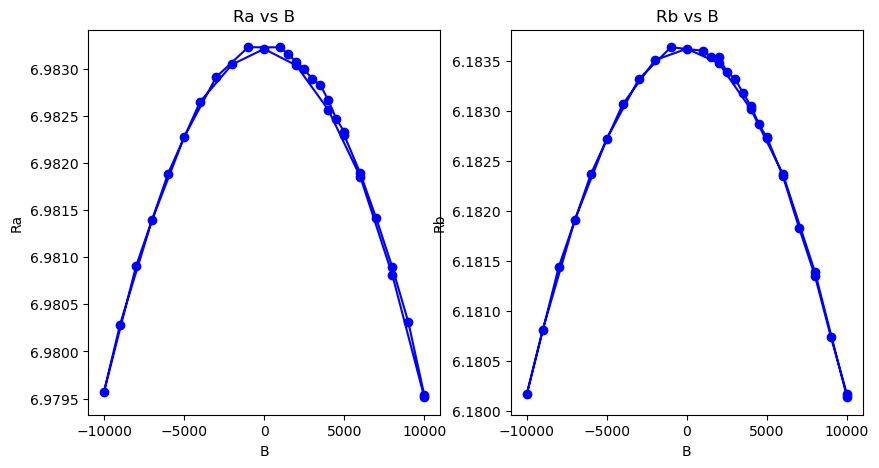

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(df['B'], df['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(df['B'], df['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

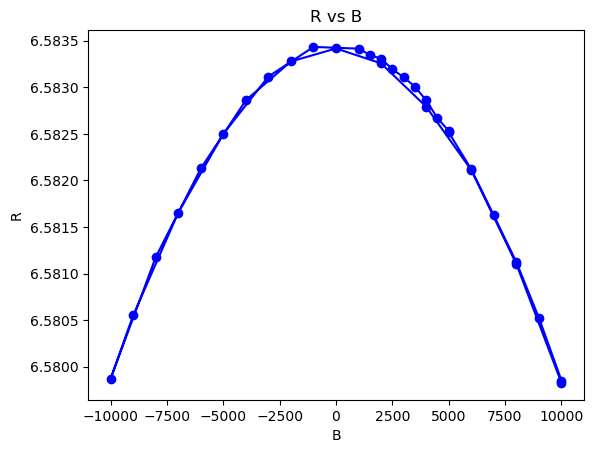

In [9]:
plt.plot(df['B'], df['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [10]:
Ra0 = df.loc[df['B'] == 0]['Ra'].mean()
Rb0 = df.loc[df['B'] == 0]['Rb'].mean()
R0 = df.loc[df['B'] == 0]['R'].mean()

df['MRa'] = ((df['Ra'] - Ra0)*100)/Ra0
df['MRb'] = ((df['Rb'] - Rb0)*100)/Rb0
df['MR'] = ((df['R'] - R0)*100)/R0

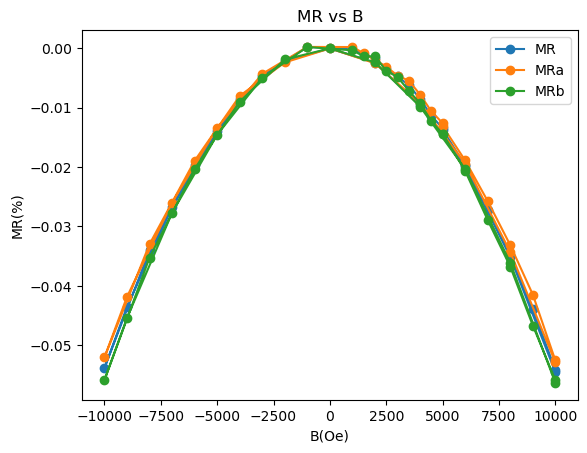

(None, 100, 10, 200)

In [11]:
plt.plot(df['B'], df['MR'], 'o-', label = "MR")
plt.plot(df['B'], df['MRa'], 'o-', label = "MRa")
plt.plot(df['B'], df['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show(), 100, 10, 200

# MR calculation with Field Correction

Averageing the current Reverse part

In [12]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [13]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df.head()

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,6979.138047,6180.342564,6979.936705,6179.992727,1000000
1,0.001,9000,6980.156012,6180.905345,6980.468980,6180.569104,1000000
2,0.001,8000,6980.725546,6181.467395,6981.061516,6181.233407,1000000
3,0.001,7000,6981.245637,6181.969665,6981.578009,6181.700907,1000000
4,0.001,6000,6981.744687,6182.456124,6982.035632,6182.238598,1000000


In [14]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [15]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec Field dataset

In [16]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)
data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 
data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [17]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [18]:
data_dec.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
20,0.001,8000,6980.725546,6181.467395,6981.061516,6181.233407,6981.089488,6181.367849,6980.721399,6181.521050,1000000,6980.907517,6181.417622,6980.891458,6181.377228
41,0.001,6000,6981.744687,6182.456124,6982.035632,6182.238598,6982.044089,6182.330658,6981.729723,6182.406539,1000000,6981.894388,6182.393391,6981.882678,6182.322569
82,0.001,4000,6982.585858,6183.141073,6982.744730,6182.960767,6982.730269,6183.044401,6982.568569,6183.097116,1000000,6982.658064,6183.092737,6982.656649,6183.028942
123,0.001,2000,6983.052446,6183.602615,6983.089785,6183.477288,6983.089965,6183.498571,6982.996935,6183.518860,1000000,6983.071206,6183.550593,6983.043360,6183.498074
209,0.001,-10000,6979.812877,6180.067202,6979.334133,6180.269994,6979.313499,6180.296082,6979.715630,6179.982019,1000000,6979.563188,6180.181642,6979.524881,6180.126006


In [19]:
# data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
# data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Field Dataset

In [20]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)
data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 
data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns
data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [21]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [22]:
data_inc.head()

,I,B,V1,V2,V3,V4,V5,V6,V7,V8,multiplier,V15,V26,V37,V48
2,0.001,-8000,6981.089488,6181.367849,6980.721399,6181.521050,6980.725546,6181.467395,6981.061516,6181.233407,1000000,6980.907517,6181.417622,6980.891458,6181.377228
25,0.001,-6000,6982.044089,6182.330658,6981.729723,6182.406539,6981.744687,6182.456124,6982.035632,6182.238598,1000000,6981.894388,6182.393391,6981.882678,6182.322569
50,0.001,-4000,6982.730269,6183.044401,6982.568569,6183.097116,6982.585858,6183.141073,6982.744730,6182.960767,1000000,6982.658064,6183.092737,6982.656649,6183.028942
75,0.001,-2000,6983.089965,6183.498571,6982.996935,6183.518860,6983.052446,6183.602615,6983.089785,6183.477288,1000000,6983.071206,6183.550593,6983.043360,6183.498074
209,0.001,10000,6979.313499,6180.296082,6979.715630,6179.982019,6979.812877,6180.067202,6979.334133,6180.269994,1000000,6979.563188,6180.181642,6979.524881,6180.126006


### Stacking both the datas

In [23]:
data = pd.concat([data_dec,data_inc])

In [24]:
data['Ra'] = (data['V15'] + data['V37'])/(2*data['I']*data['multiplier'])
data['Rb'] = (data['V26'] + data['V48'])/(2*data['I']*data['multiplier'])
data['R'] = (data['Ra'] + data['Rb'])/2

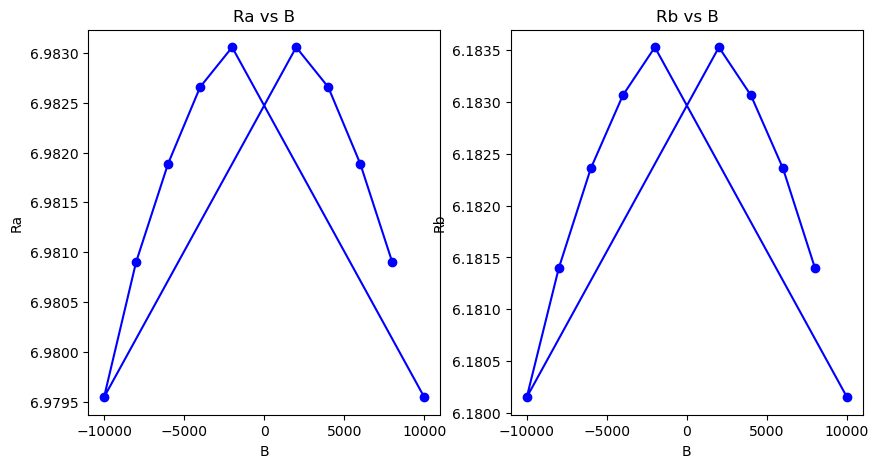

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(data['B'], data['Ra'],'bo-')
plt.title('Ra vs B')
plt.ylabel('Ra')
plt.xlabel('B')

plt.subplot(1,2,2)
plt.plot(data['B'], data['Rb'],'bo-')
plt.title('Rb vs B')
plt.ylabel('Rb')
plt.xlabel('B')

plt.show()

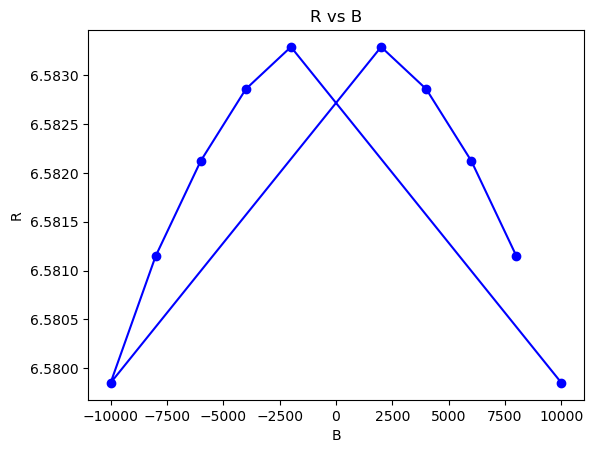

In [26]:
plt.plot(data['B'],data['R'],'bo-')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Comparing MR of Ra, Rb, R

In [27]:
Ra0 = data.loc[data['B'] == 0]['Ra'].mean()
Rb0 = data.loc[data['B'] == 0]['Rb'].mean()
R0 = data.loc[data['B'] == 0]['R'].mean()

data['MRa'] = ((data['Ra'] - Ra0)*100)/Ra0
data['MRb'] = ((data['Rb'] - Rb0)*100)/Rb0
data['MR'] = ((data['R'] - R0)*100)/R0

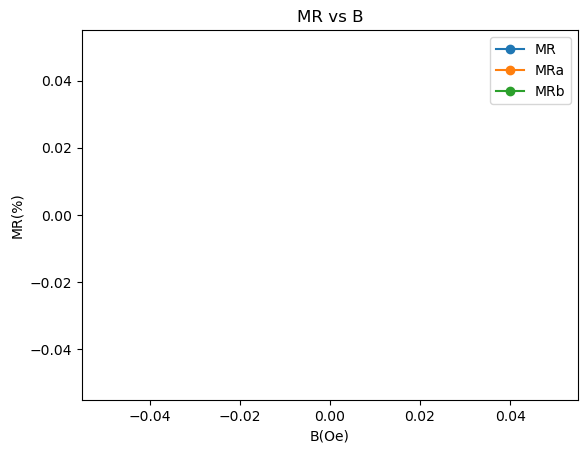

In [28]:
plt.plot(data['B'], data['MR'], 'o-', label = "MR")
plt.plot(data['B'], data['MRa'], 'o-', label = "MRa")
plt.plot(data['B'], data['MRb'], 'o-', label = "MRb")
plt.title('MR vs B')
plt.ylabel('MR(%)')
plt.xlabel('B(Oe)')
plt.legend()
plt.show()

In [29]:
data.to_pickle(f"./pickle_data/MR_{t}K.pkl")